# Kissipo深度學習進行『風格轉換』(Style Transfer)

![Style Transfer](https://ithelp.ithome.com.tw/upload/images/20171208/20001976DytMaXo2O0.png) 

* 內容圖片稱為Content Image(C)
* 風格圖片稱為Style Image(S)
* 合成圖片稱為Generated Image (G)

## Step 1: Import modules


In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
from PIL import Image
from IPython.display import display

## Step 2: (IPO-M) 從TF-Hub讀入風格轉換的深度學習模型(Load a model from TF-Hub)

In [ ]:
hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

## Step 3: (IPO-I) 讀入內容圖片(Read a content image)



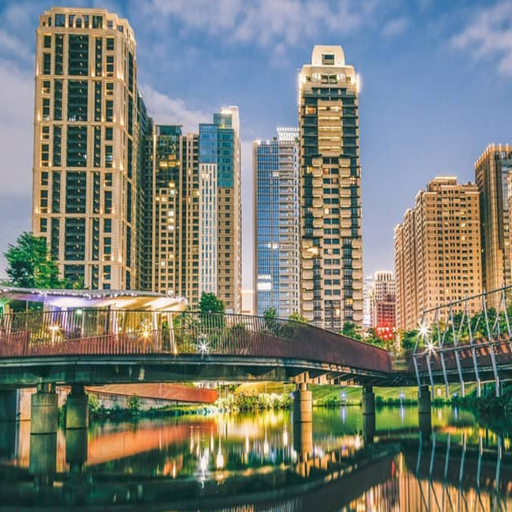

In [ ]:
content_image = Image.open('content2.bmp')
content_image=content_image.resize((512, 512))
display(content_image)

## Step 4: (IPO-I) 讀入風格圖片(Read a style image)

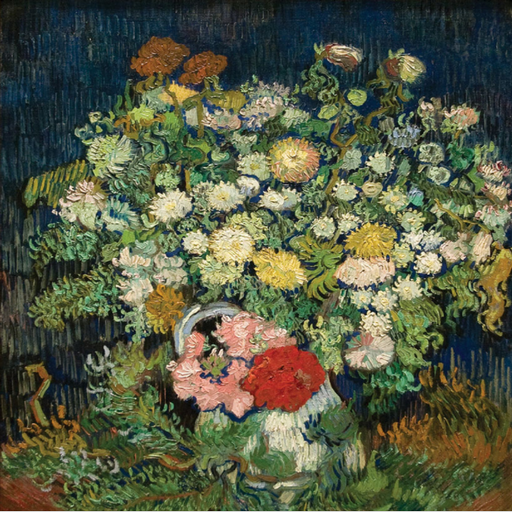

In [ ]:
style_image = Image.open('style2.bmp')
style_image=style_image.resize((512, 512))
display(style_image)

## Step 5: (IPO-I) 將影像轉換成model的輸入資料


In [ ]:
content_arr = np.array(content_image)/ 255.0
content_arr = content_arr.reshape(1,512,512,3)
content_tensor = tf.image.convert_image_dtype(content_arr, tf.float32)

style_arr = np.array(style_image)/ 255.0
style_arr = style_arr.reshape(1,512,512,3)
style_tensor = tf.image.convert_image_dtype(style_arr, tf.float32)

## Step 6: (IPO-P) 執行Model,進行影像的風格轉換(Generate style-transfered images)
$M(X_c, X_s)=G$

In [ ]:
output_tensor = hub_model(tf.constant(content_tensor), tf.constant(style_tensor))[0]

## Step 7: (IPO-O) 將模型輸出轉成影像 

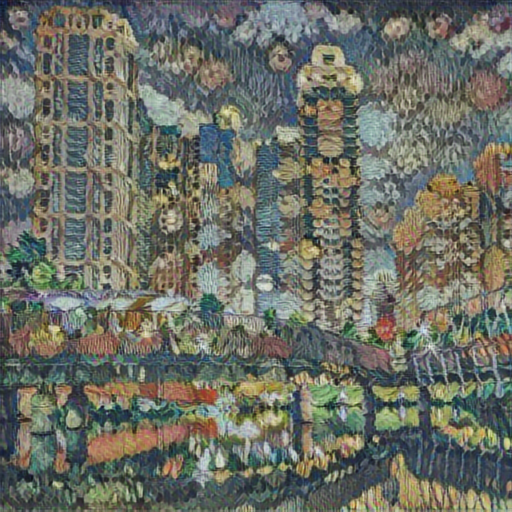

In [ ]:
output_tensor = output_tensor*255
output_arr = np.array(output_tensor, dtype=np.uint8)
output_arr = output_arr.reshape(512,512,3)
output_image=Image.fromarray(output_arr)
display(output_image)

## Step 8: (IPO-O) 將影像存檔

In [ ]:
output_image.save("styled.jpg")